In [1]:
from eda import pre_process as epp
from eda import eda

In [2]:
paths = ['/code/data/sample_data_5k.csv']

split = [80, 20, 20]
data_5k = epp.read_file(paths[0], mode=0)
train_data, test_data, val_data = epp.dataset_split(data_5k, split)
print(len(train_data), len(test_data), len(val_data))

3200 1000 800


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   terminaltime         5000 non-null   float64
 1   soc                  5000 non-null   int64  
 2   speed                5000 non-null   float64
 3   totalodometer        5000 non-null   float64
 4   chargestatus         5000 non-null   int64  
 5   totalvoltage         5000 non-null   float64
 6   totalcurrent         5000 non-null   float64
 7   minvoltagebattery    5000 non-null   float64
 8   maxvoltagebattery    5000 non-null   float64
 9   mintemperaturevalue  5000 non-null   int64  
 10  maxtemperaturevalue  5000 non-null   int64  
 11  batteryvoltage       4909 non-null   object 
 12  probetemperatures    4909 non-null   object 
dtypes: float64(7), int64(4), object(2)
memory usage: 507.9+ KB
None

Summary Statistics:
       terminaltime          soc        s

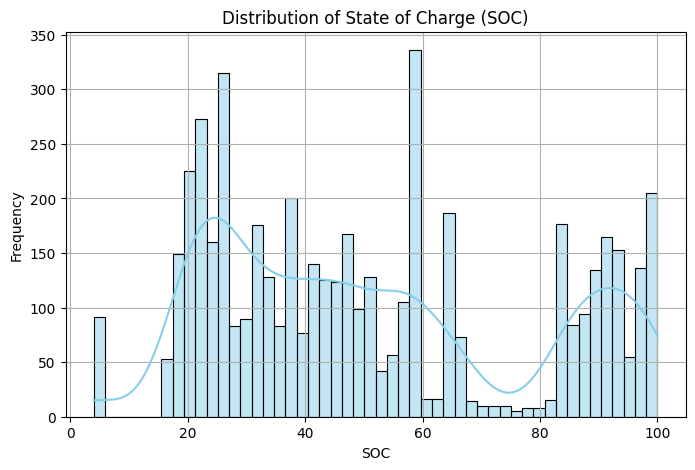

In [3]:
eda.info(data_5k)


Top 5 positively correlated features with SOC:
maxvoltagebattery      0.564261
totalvoltage           0.562645
minvoltagebattery      0.555907
maxtemperaturevalue    0.444656
mintemperaturevalue    0.407655
Name: soc, dtype: float64

Top 5 negatively correlated features with SOC:
totalodometer    0.307370
totalcurrent     0.217530
speed           -0.010576
terminaltime    -0.053028
chargestatus    -0.243935
Name: soc, dtype: float64


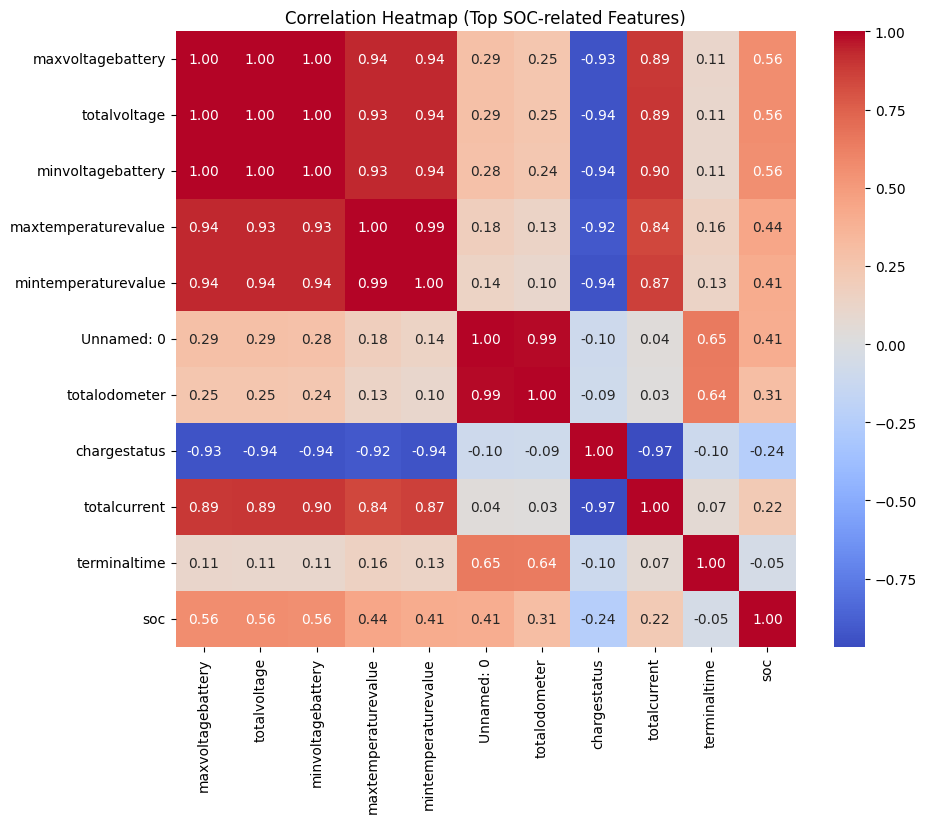

In [4]:
corr_matrix = eda.corr(data_5k)

Features with |correlation| > 0.4 with SOC:
maxvoltagebattery      0.564261
totalvoltage           0.562645
minvoltagebattery      0.555907
maxtemperaturevalue    0.444656
mintemperaturevalue    0.407655
Unnamed: 0             0.405364
Name: soc, dtype: float64


/code/src/eda/eda.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_corr.values, y=strong_corr.index, palette='coolwarm', orient='h')


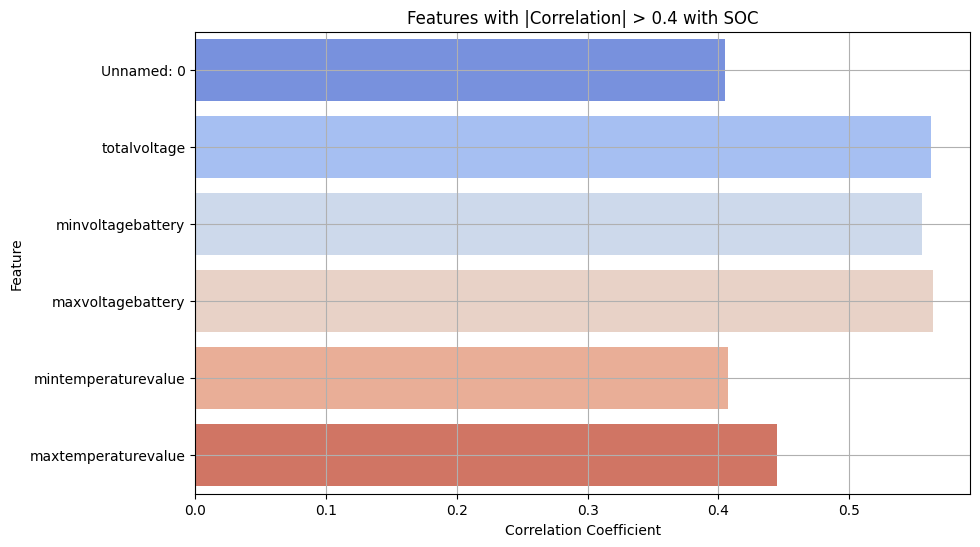

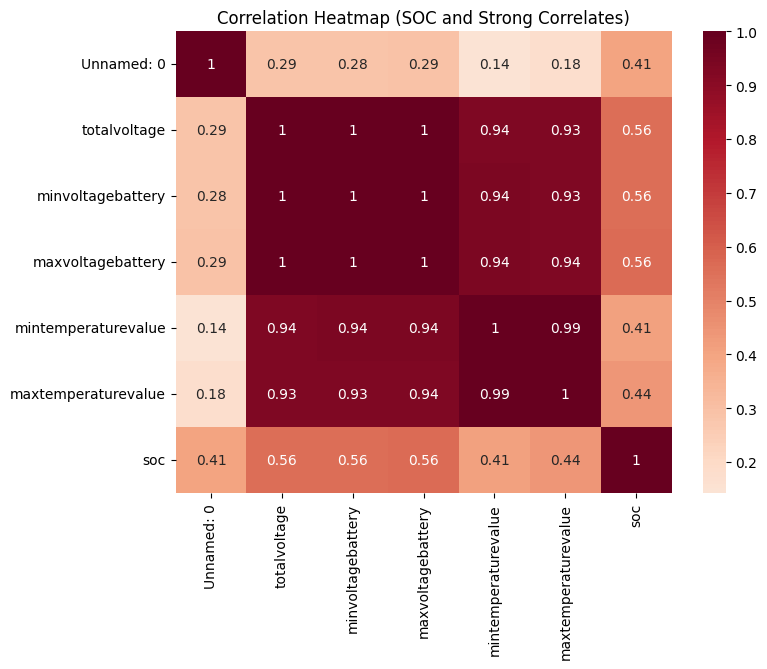

Dropped features (|correlation with SOC| ≤ 0.4):
['chargestatus', 'totalcurrent', 'speed', 'terminaltime', 'totalodometer']


In [5]:
eda.feature_eng(data_5k, corr_matrix)

In [6]:
strong_corr = eda.strg_corr(data_5k)

Features with |correlation| > 0.4 to SOC:
totalvoltage               0.973698
batteryvoltage_clean       0.973686
minvoltagebattery          0.972619
maxvoltagebattery          0.970129
probetemperatures_clean    0.563252
maxtemperaturevalue        0.561583
mintemperaturevalue        0.518184
Name: soc, dtype: float64


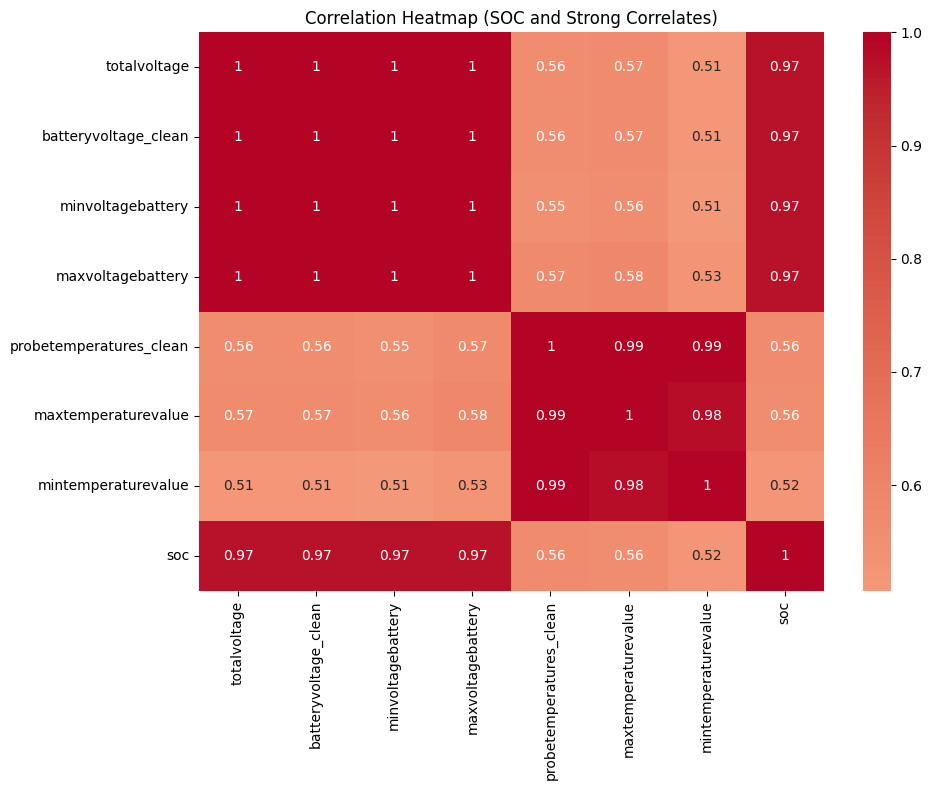

/code/src/eda/eda.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_corr.values, y=strong_corr.index, palette='coolwarm', orient='h')


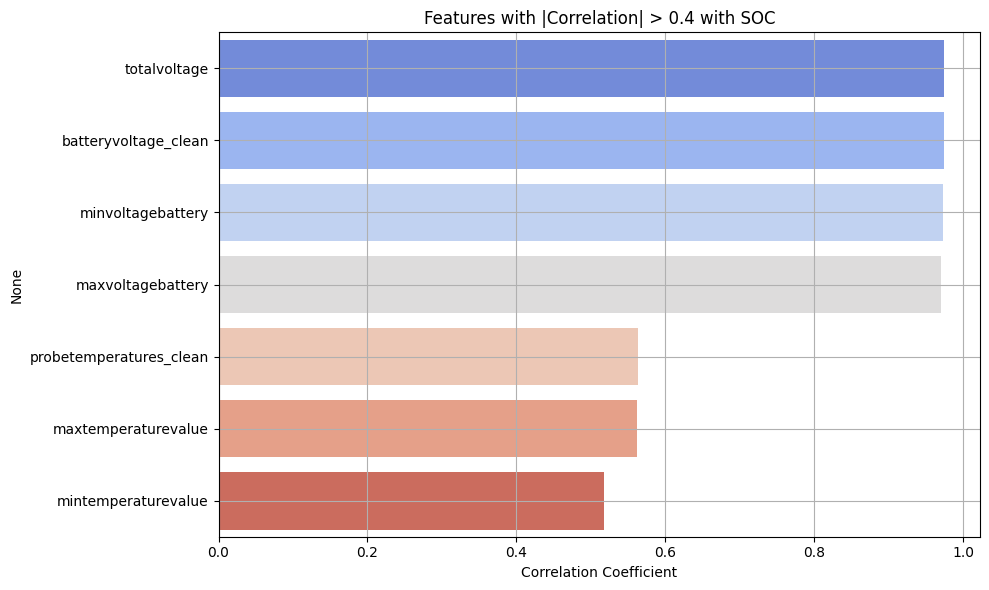

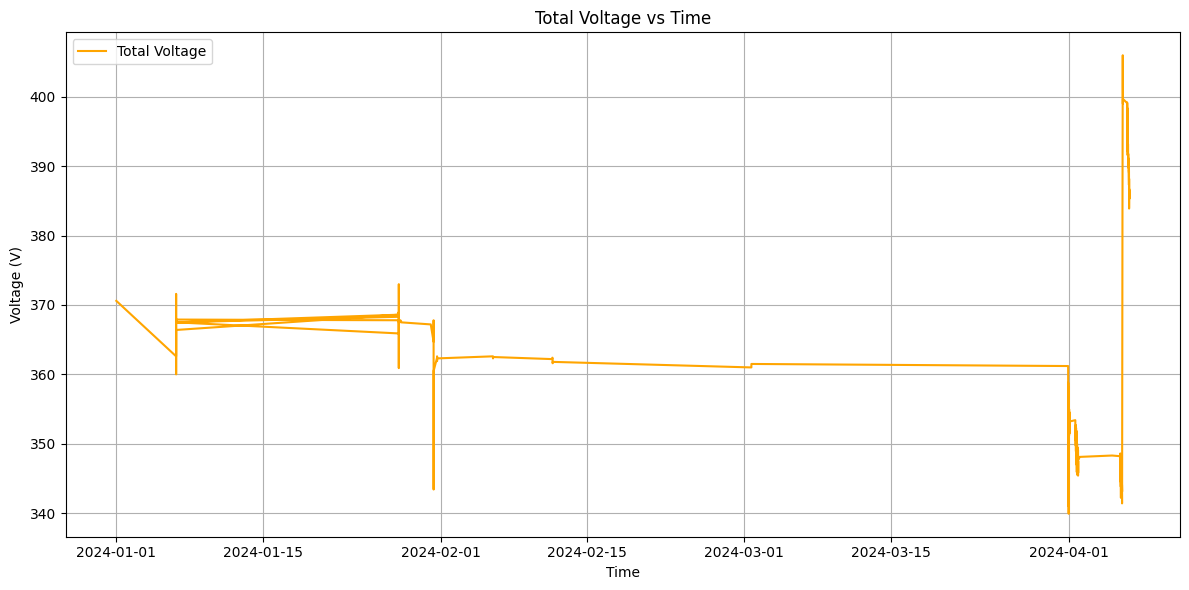

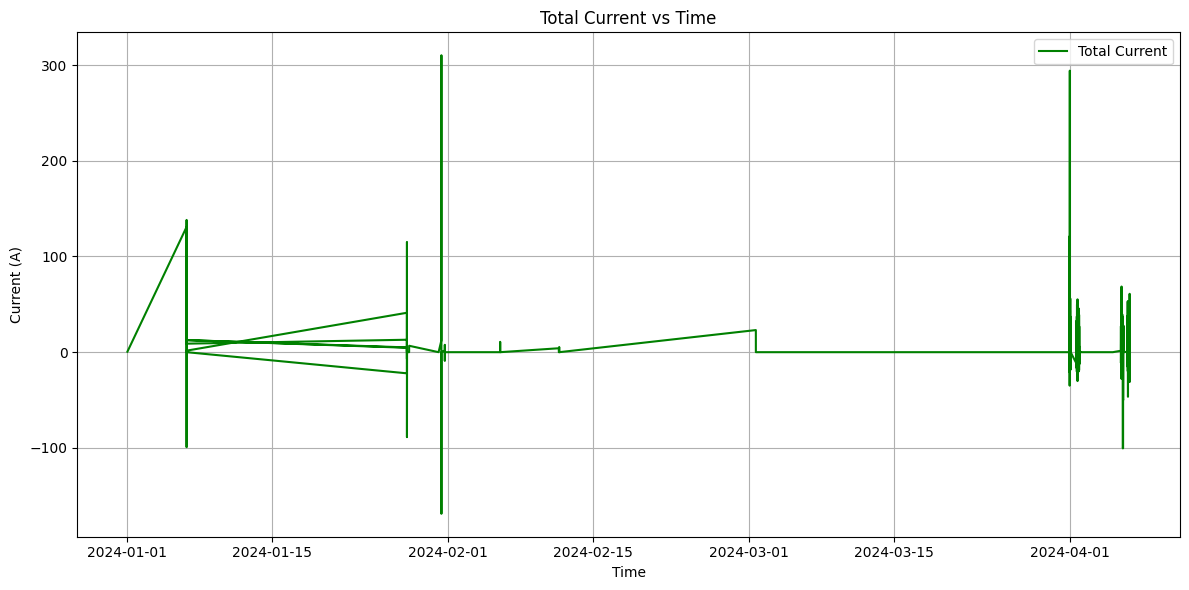

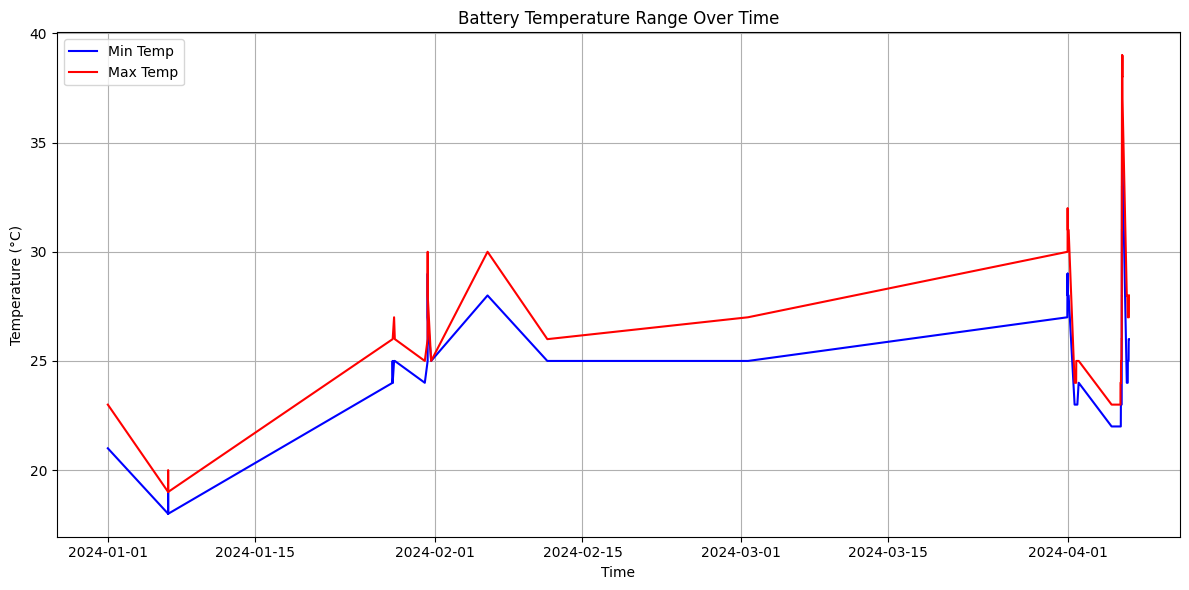

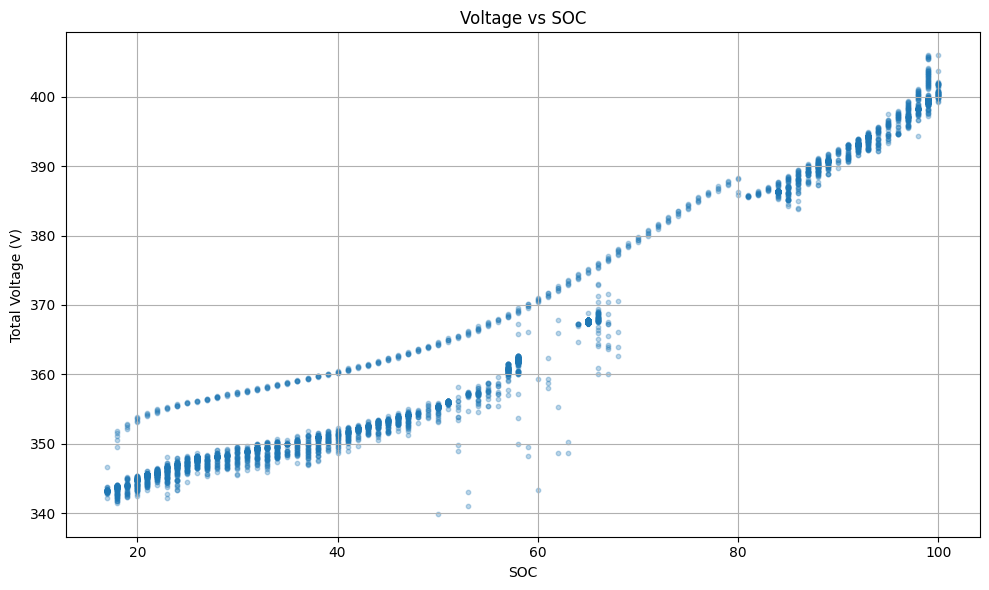

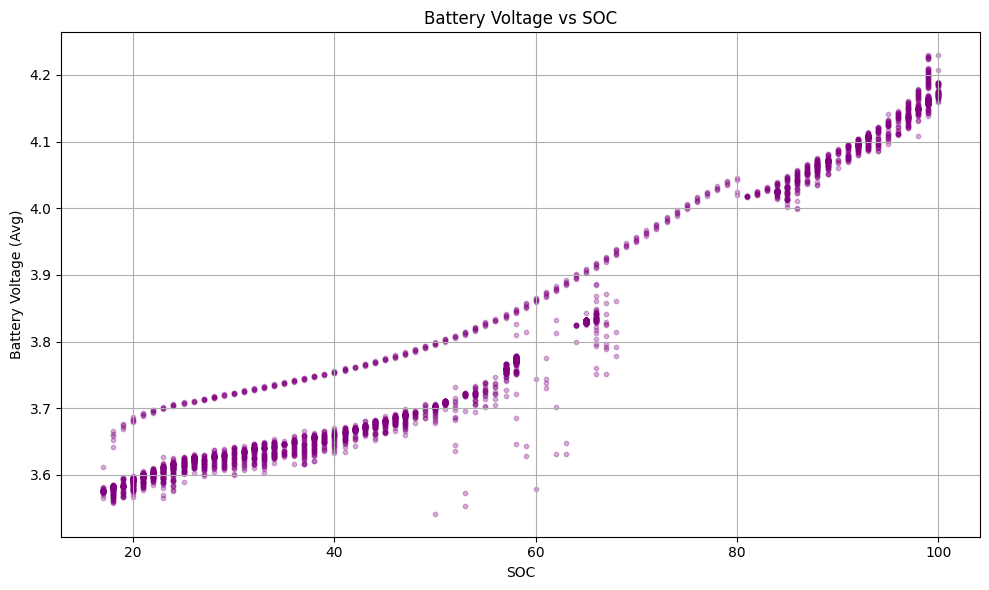

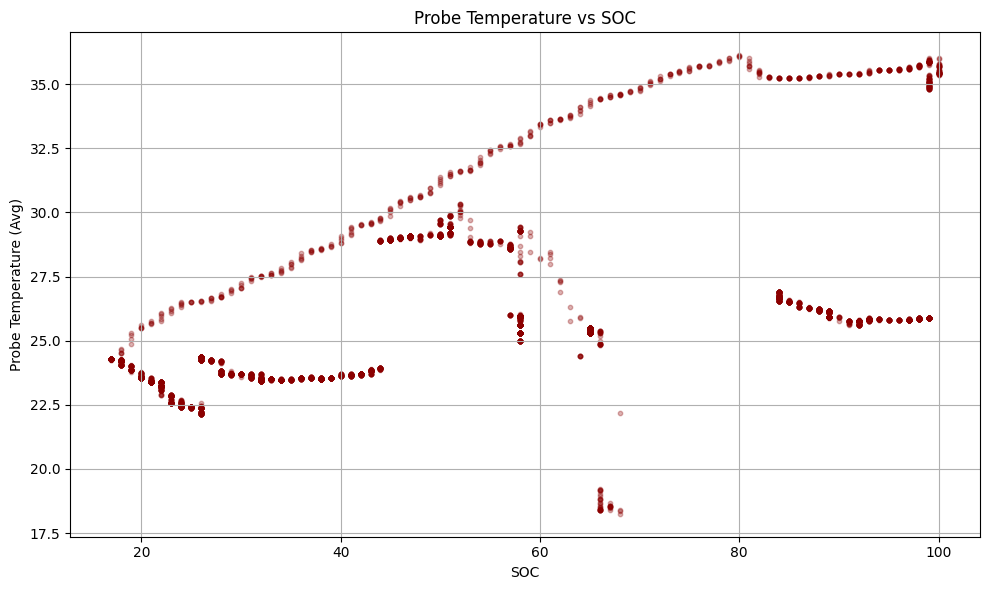

In [7]:
eda.heatmap(data_5k, strong_corr)